In [1]:
import os
import tweepy as tw
import pandas as pd
import csv
import os
import matplotlib.pyplot as plt
from collections import Counter
import re
from tweetload import downloadTweets, preprocessTweets, preprocessTweets_OHE
from utilities import readNames
import seaborn as snss
import numpy as np
from matplotlib.collections import EllipseCollection
from tweetload import my_specific_dictionary
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import sklearn
import json, pickle
import tweepy
from preprocess import extractTweetFeatures , BoW, getPopularityIndex, encodePandas, dropZeros, encodeSklearn

In [2]:
food_words = readNames("food_words")
not_food_words = readNames("not_food_word")
food_words = list(set(food_words) - set(not_food_words))

In [3]:
X = extractTweetFeatures('all_tweets_moreUsers_1e5.pkl', food_words)
X.to_pickle('TwitterData_1e5.pkl')

In [19]:
X = pd.read_pickle('TwitterData_1e5.pkl')

In [15]:
print(len(X), np.count_nonzero(np.array(X['popularity'])==0))

15410 157


(array([1565., 5923., 1670., 3500., 4160.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

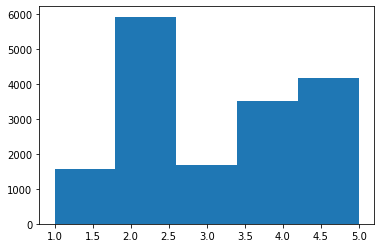

In [22]:
y = getPopularityIndex(X,4)
plt.hist(y, bins=5)

In [23]:
# X = dropZeros(X,frac_to_remove=0.9)
X.to_pickle('TwitterData_1e5_90rm.pkl')